In [1]:
'''
the codebase originally has multiple files ,which has been converted into a single .ipynb file for the purpose of submission of the final project
the original codebase looked something like this 
train.py
infer.py
utils_.py
performance_metrics.py
heartDisease.csv

the original version is available at https://github.com/tadpole-404/HeartDisease_Prediction
which is our remote git repository, the code is written and owned by us.
'''

'\nthe codebase originally has multiple files ,which has been converted into a single .ipynb file for the purpose of submission of the final project\nthe original codebase looked something like this \ntrain.py\ninfer.py\nutils_.py\nperformance_metrics.py\nheartDisease.csv\n\nthe original version is available at https://github.com/tadpole-404/HeartDisease_Prediction\nwhich is our remote git repository, the code is written and owned by us.\n'

In [2]:
# this is the utlis_ used in train and test script
import pandas as pd
import numpy as np

def read_data(path,features):
    ''' 
    reads the csv file and returns the data as pandas datafield
    '''
    data=pd.read_csv(path)
    df=pd.DataFrame(data)

    return preprocess_input(df,features)
   
   
def preprocess_input(df,features):
    ''' 
    this function is meant to preprocess csv , converting strings to numbers 
    
    params :
    df :datafield 
    features: list of features to be preprocessed
    
    returns 
    processed datafield
    
    '''
    for feature in features:
        values=df[feature].unique()
        for i,value in enumerate(values):
            df[feature]=[i if element==value else element for element in df[feature]]
    return df

def normalize(df,features):
    ''' 
    used to normalize inputs by making mean=0 and standard deviation=1
    
    params
    df: input as pandas datafield
    features: list of keys of features to be normalized
    
    returns
    df: datafield after normalisation 
    mean: dictionary containing mean of features normalised
    std: dictionary containing standard deviation of features normalised    
    
    '''
    
    mean={feature:0. for feature in features}
    std={feature:0. for feature in features}
    for feature in features:
        mean[feature]=np.mean(df[feature])
        std[feature]=np.std(df[feature])
        df[feature]=(df[feature]-mean[feature])/std[feature]
    
    return df,mean,std

def normalize_with_mean_std(df,features,mean,std):
    '''
    this function normalises the given features to given mean and standard deviation
    
    params
    df: input as pandas datafield
    features: list of keys of features to be normalized
    mean: dictionary containing mean of features normalised
    std: dictionary containing standard deviation of features normalised    
    
    returns
    df: datafield after normalisation 
    
    '''
    for feature in features:
        mean[feature]=np.mean(df[feature])
        std[feature]=np.std(df[feature])
        df[feature]=(df[feature]-mean[feature])/std[feature]
    
    return df
    
def forward_prop(W,X,b):
    return 1/(1+np.exp(-(np.dot(W,X)+b))),np.exp(-(np.dot(W,X)+b))

# binary cross entropy loss
def loss(y,y_hat,batch):

    return np.sum(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))/batch

def gradients(X,Y,Y_hat,exp):
    dW=[]
    for i in range(X.shape[0]):
        grad=(Y_hat-Y)*X/X.shape[1]
        grad=np.sum(grad)
        dW.append(grad)
    db=(Y_hat-Y)/X.shape[1]
    db=np.sum(db)
    
    return dW,db

def update(dW,db,W,b,alpha):
    for i in range(W.shape[0]):
        W[i]=W[i]-alpha*dW[i]
    b=b-alpha*db
    return W,b
    

In [3]:
#this is the train script

import utlis_ as u
import numpy as np
from tqdm import tqdm
import json
#hyperparameters
alpha=0.0056
epoch=5000
batch=482
loss_stored=[]
flag=1
#reading data

features_preprocess=["AgeCategory","Race","GenHealth","HeartDisease",'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
df=u.read_data('heartDisease.csv',features_preprocess)
features_normalise=["BMI","SleepTime","PhysicalHealth","MentalHealth","AgeCategory","Race","GenHealth"]
df,mean,std=u.normalize(df,features_normalise)

with open('mean.json', 'w') as json_file:
    json.dump(mean, json_file)
    print('saved mean!!')
with open('std.json', 'w') as json_file:
    json.dump(std, json_file)
    print('saved std')


data=[]
for key in df.keys():
    if key=='HeartDisease':
        Y=np.array(df[key])
    else:
        data.append(df[key])
    
X=np.array(data,np.float32)

Y=np.reshape(Y,(1,Y.shape[0]))


#random intialisation of weights
# np.random.seed(42)
if flag:
    W=np.load('weights/W_weights epoch:0.npy')
    b=np.load('weights/b_weights epoch:0.npy')
    
else:
    
    W=np.random.randn(1,17)
    b=np.random.randn(1)
# print(W.shape)
# print(b.shape)
for i in tqdm(range(epoch),unit='iteration'):
    loss=0
    for j in range(0,X.shape[1],batch):

        Y_hat,exp=u.forward_prop(W,X[:,j:j+batch],b)

        dW,db=u.gradients(X[:,j:j+batch],Y[:,j:j+batch],Y_hat,exp)
        W,b=u.update(dW,db,W,b,alpha)
        # print('done')
        if i%50==0:
            print(loss)
            loss+=u.loss(Y[:,j:j+batch],Y_hat,batch)

    if i%50==0:
        print(f'loss is :{loss}')
        loss_stored.append(loss)
        #weight decay
    
    if i%100==0:
        print('saved weights')
        np.save(f'weights/W_weights epoch:{i}.npy',W)
        np.save(f'weights/b_weights epoch:{i}.npy',b)
        alpha/=2
        
np.save('loss.npy',np.array(loss_stored))# saved after every 50 epoch

print(Y)
pred,_=u.forward_prop(W,X,b)
print(np.round(pred))

saved mean!!
saved std


  5%|▍         | 228/5000 [00:00<00:02, 2267.43iteration/s]

0
loss is :0.46283054542495383
saved weights
0
loss is :0.4583722168002229
0
loss is :0.4554125526529553
saved weights
0
loss is :0.45423694037510254
0
loss is :0.4532368264626299
saved weights
0
loss is :0.4527738443231898
0
loss is :0.45234601831835597
saved weights
0
loss is :0.45213683407565647
0
loss is :0.45193718764345026
saved weights


  9%|▉         | 462/5000 [00:00<00:01, 2306.62iteration/s]

0
loss is :0.4518373457990471


 15%|█▌        | 772/5000 [00:00<00:01, 2667.22iteration/s]

0
loss is :0.45174070489256213
saved weights
0
loss is :0.45169188187637577
0
loss is :0.45164431358276413
saved weights
0
loss is :0.45162016609316735
0
loss is :0.4515965648226208
saved weights
0
loss is :0.4515845558192199
0
loss is :0.45157280027330027
saved weights
0
loss is :0.45156681180171354
0
loss is :0.4515609452233406
saved weights
0
loss is :0.4515579549758354
0
loss is :0.4515550244756361
saved weights
0
loss is :0.45155353034656065


 22%|██▏       | 1080/5000 [00:00<00:01, 2826.31iteration/s]

0
loss is :0.4515520657925042
saved weights


 34%|███▍      | 1700/5000 [00:00<00:01, 2983.94iteration/s]

0
loss is :0.4515513189763369
0
loss is :0.45155058687316924
saved weights
0
loss is :0.451550213527141
0
loss is :0.45154984751900346
saved weights
0
loss is :0.4515496608614985
0
loss is :0.4515494778682891
saved weights
0
loss is :0.4515493845434133
0
loss is :0.45154929304952307
saved weights
0
loss is :0.4515492463880542
0
loss is :0.45154920064178783
saved weights
0
loss is :0.4515491773112956
0
loss is :0.45154915443833205
saved weights
0
loss is :0.4515491427731465


 46%|████▋     | 2316/5000 [00:00<00:00, 3030.42iteration/s]

0
loss is :0.45154913133670715
saved weights
0
loss is :0.4515491255041295
0
loss is :0.4515491197859204
saved weights
0
loss is :0.4515491168696351
0
loss is :0.4515491140105329
saved weights
0
loss is :0.4515491125523916
0
loss is :0.4515491111228417
saved weights
0
loss is :0.45154911039377066
0
loss is :0.45154910967899514
saved weights
0
loss is :0.45154910931445996
0
loss is :0.45154910895707245
saved weights
0
loss is :0.45154910877480514


 52%|█████▏    | 2620/5000 [00:00<00:00, 2881.33iteration/s]

0
loss is :0.45154910859611175
saved weights
0
loss is :0.451549108504978
0
loss is :0.4515491084156311
saved weights
0
loss is :0.45154910837006446
0
loss is :0.4515491083253912
saved weights
0
loss is :0.4515491083026074
0
loss is :0.4515491082802705
saved weights
0
loss is :0.4515491082688789
0
loss is :0.4515491082577106
saved weights
0
loss is :0.45154910825201416


 58%|█████▊    | 2910/5000 [00:01<00:00, 2746.36iteration/s]

0
loss is :0.4515491082464295
saved weights


 64%|██████▍   | 3205/5000 [00:01<00:00, 2802.64iteration/s]

0
loss is :0.45154910824358196
0
loss is :0.45154910824079025
saved weights
0
loss is :0.4515491082393661
0
loss is :0.4515491082379699
saved weights
0
loss is :0.4515491082372584
0
loss is :0.45154910823656086
saved weights
0
loss is :0.45154910823620437
0
loss is :0.4515491082358548
saved weights
0
loss is :0.45154910823567646
0
loss is :0.45154910823550154
saved weights
0
loss is :0.4515491082354131
0
loss is :0.45154910823532646
saved weights


 70%|███████   | 3514/5000 [00:01<00:00, 2884.20iteration/s]

0
loss is :0.45154910823528177


 83%|████████▎ | 4133/5000 [00:01<00:00, 2988.06iteration/s]

0
loss is :0.4515491082352381
saved weights
0
loss is :0.45154910823521593
0
loss is :0.45154910823519445
saved weights
0
loss is :0.4515491082351836
0
loss is :0.45154910823517325
saved weights
0
loss is :0.4515491082351675
0
loss is :0.45154910823516176
saved weights
0
loss is :0.4515491082351589
0
loss is :0.4515491082351561
saved weights
0
loss is :0.4515491082351549
0
loss is :0.45154910823515365
saved weights
0
loss is :0.45154910823515254
0
loss is :0.45154910823515143
saved weights


 95%|█████████▍| 4745/5000 [00:01<00:00, 3021.57iteration/s]

0
loss is :0.45154910823515104
0
loss is :0.4515491082351506
saved weights
0
loss is :0.4515491082351506
0
loss is :0.45154910823515076
saved weights
0
loss is :0.4515491082351506
0
loss is :0.4515491082351506
saved weights
0
loss is :0.45154910823515054
0
loss is :0.45154910823515054
saved weights
0
loss is :0.45154910823515054
0
loss is :0.45154910823515054
saved weights
0
loss is :0.45154910823515054
0
loss is :0.45154910823515054
saved weights
0
loss is :0.45154910823515054


100%|██████████| 5000/5000 [00:01<00:00, 2905.02iteration/s]

0
loss is :0.45154910823515054
saved weights
0
loss is :0.45154910823515054
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
  0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [4]:
# this is the test script 



import numpy as np
import json
import pandas as pd
import utlis_ as u
def infer(W_path,b_path,batch,features_preprocess,features_normalise,data_path):
#load model
    W=np.load(W_path)
    b=np.load(b_path)
    with open('mean.json') as file:
        mean=json.load(file)
    with open('std.json') as file:
        std=json.load(file)
    
    
    df=u.read_data(data_path,features_preprocess)
    
    df=u.normalize_with_mean_std(df,features_normalise,mean,std)
    ran=np.random.randint(0,281,(batch))

    try:
        input=np.array([df.iloc[ran[i].item()] for i in range(batch)],np.float32)
    except:
        print(batch)
    input=np.transpose(input,(1,0))
    X=input[1:,:]
    gt=input[0,:]

    print(W.shape)
    Y_prediction,_=u.forward_prop(W,X,b)

    Y_prediction_round=np.round(Y_prediction)
    return(Y_prediction_round,gt,Y_prediction)

    

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from infer import infer
import utlis_ as u
import seaborn as sns

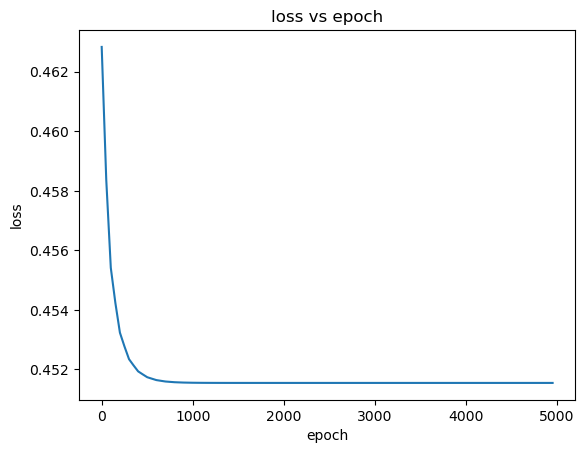

In [6]:
loss=np.load('loss.npy')
ls=[]
for i in range(0,100):
    ls.append(i*50)
plt.plot(ls,loss)
plt.title('loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [7]:
W_path="weights/W_weights epoch:4900.npy"
b_path="weights/b_weights epoch:4900.npy"
features_preprocess=["AgeCategory","Race","GenHealth","HeartDisease",'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
features_normalise=["BMI","SleepTime","PhysicalHealth","MentalHealth","AgeCategory","Race","GenHealth"]
data_path='heartDisease.csv'
batch=482
    
y_pred,y_true,raw_pred=infer(W_path,b_path,batch,features_preprocess,features_normalise,data_path)
conf_matrix = confusion_matrix(np.reshape(y_true,(-1)), np.reshape(y_pred,(-1)))

(1, 17)


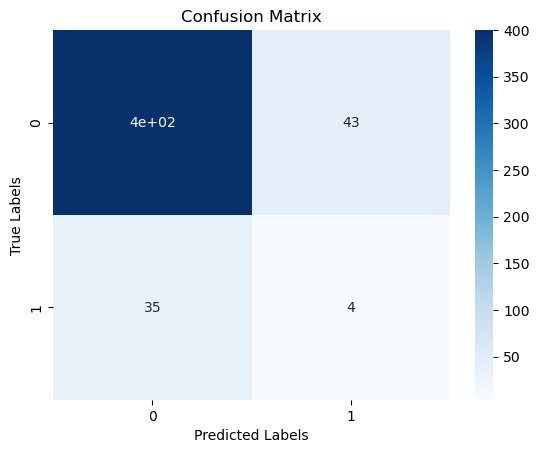

In [8]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [9]:
Accuracy=1-np.count_nonzero(y_pred-y_true)/batch

In [10]:
print(Accuracy)

0.8381742738589212
